In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

#from xgcm import Grid

### Make a 2D ncfile of bathymetry
Use ISOMIP+ Ocean1 file to get dimension names more easily

In [3]:
!pwd

/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/2D-triangle-quiet


In [7]:
ISOMIPthick = xr.open_dataset('../layer-melton/INPUT/Ocean1_3D.nc')
ISOMIPthick

<xarray.Dataset>
Dimensions:  (ny: 40, nx: 240)
Dimensions without coordinates: ny, nx
Data variables:
    thick    (ny, nx) float64 ...
    area     (ny, nx) float64 ...

In [22]:
ISOMIPthick.area.values

array([[4000000., 4000000., 4000000., ...,       0.,       0.,       0.],
       [4000000., 4000000., 4000000., ...,       0.,       0.,       0.],
       [4000000., 4000000., 4000000., ...,       0.,       0.,       0.],
       ...,
       [4000000., 4000000., 4000000., ...,       0.,       0.,       0.],
       [4000000., 4000000., 4000000., ...,       0.,       0.,       0.],
       [4000000., 4000000., 4000000., ...,       0.,       0.,       0.]])

In [23]:
TwoDtrianglethick = ISOMIPthick.copy()
TwoDtrianglethick = TwoDtrianglethick.isel(ny = [0,1])
TwoDtrianglethick['thick'] = -(720/2/120)*(TwoDtrianglethick.thick*0+TwoDtrianglethick.nx)+720/2
TwoDtrianglethick['thick'] = TwoDtrianglethick.thick.where(TwoDtrianglethick.thick>0).fillna(0)
TwoDtrianglethick['area'] = (TwoDtrianglethick.area*0+2000**2).where(TwoDtrianglethick.thick>0).fillna(0)


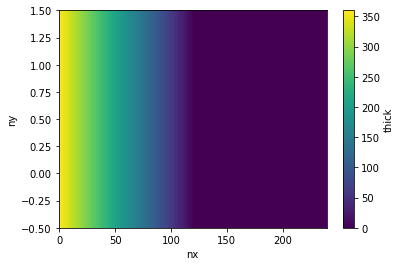

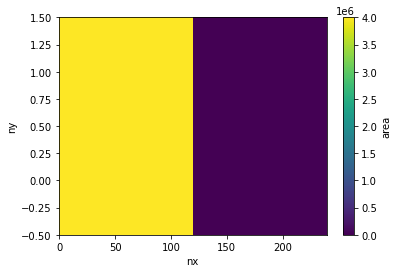

In [24]:
TwoDtrianglethick.thick.plot()
plt.show()
TwoDtrianglethick.area.plot()
plt.show()


In [26]:
!mkdir INPUT

In [27]:
#save as netcdf
TwoDtrianglethick.to_netcdf('INPUT/TwoDtrianglethick.nc')


## Now run 

Saving in `archive` with `ISOMIP_IC.nc` and `prog.nc`

In [4]:
ave = False ## True means use 5 daily average rather than hourly prog
basee = '/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/2D-triangle-quiet/archive'
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + '/prog-'+label+'.nc')
    return prog
def open_IC(folder):
    base = basee 
    IC = xr.open_dataset(base + '/MOM_IC-'+label+'.nc')
    return IC
def open_mom(folder):
    base = basee 
    IC = xr.open_dataset(base + '/mom-'+label+'.nc')
    return IC

In [4]:
! ls archive

MOM_IC-layer-nosurfpressure-hack-minthick1e-12.nc
MOM_IC-layer-nosurfpressure-nohack-minthick1e-12.nc
MOM_IC-layer-surfpressure-nohack-minthick1e-12-topo.nc
MOM_IC-layer-surfpressure-nohack-minthick1e-12.nc
MOM_IC-sigma-nosurfpressure-hack-minthick1e-12.nc
MOM_IC-sigma-nosurfpressure-nohack-minthick1e-12.nc
MOM_IC-sigma-surfpressure-hack-minthick1e-12.nc
MOM_IC-sigma-surfpressure-nohack-minthick1e-12.nc
MOM_IC-sigmashelfzstar-nosurfpressure-hack-minthick1e-12.nc
MOM_IC-sigmashelfzstar-nosurfpressure-nohack-minthick1e-12.nc
MOM_IC-sigmashelfzstar-surfpressure-hack-minthick1e-12.nc
MOM_IC-sigmashelfzstar-surfpressure-nohack-minthick1e-12.nc
MOM_IC-zstar-nosurfpressure-hack-minthick1e-12.nc
MOM_IC-zstar-nosurfpressure-nohack-minthick1e-12.nc
MOM_IC-zstar-surfpressure-hack-minthick1e-12.nc
MOM_IC-zstar-surfpressure-nohack-minthick1e-12.nc
prog-layer-nosurfpressure-hack-minthick1e-12.nc
prog-layer-nosurfpressure-nohack-minthick1e-12.nc
prog-layer-surfpressure-nohack-minthick1e-12-topo.nc
pr

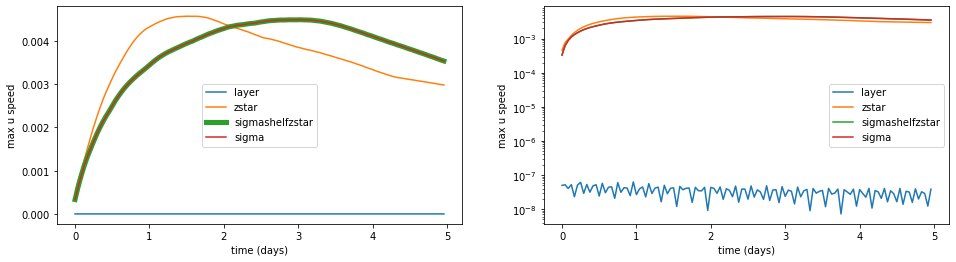

In [113]:
## Plot velocities
fig, axes = plt.subplots(ncols = 2, figsize = (16,4))

label = 'layer-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigmashelfzstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigmashelfzstar', linewidth = 5) 

label = 'sigma-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 
axes[0].set_ylabel('max u speed')
axes[0].set_xlabel('time (days)')

axes[0].legend()
###########

label = 'layer-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigmashelfzstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigmashelfzstar') 

label = 'sigma-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 
axes[1].set_ylabel('max u speed')
axes[1].set_xlabel('time (days)')

axes[1].legend()
axes[1].set_yscale('log')

In [5]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
#     grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
#                              "y":{"center":"yh","outer":"yq"},
#                              "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_IC(label)
    depth = IC.eta#grid.interp(prog.e,'x')
    lon = ocean_static.geolon
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu"): dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_3605/2118687101.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_3605/2118687101.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

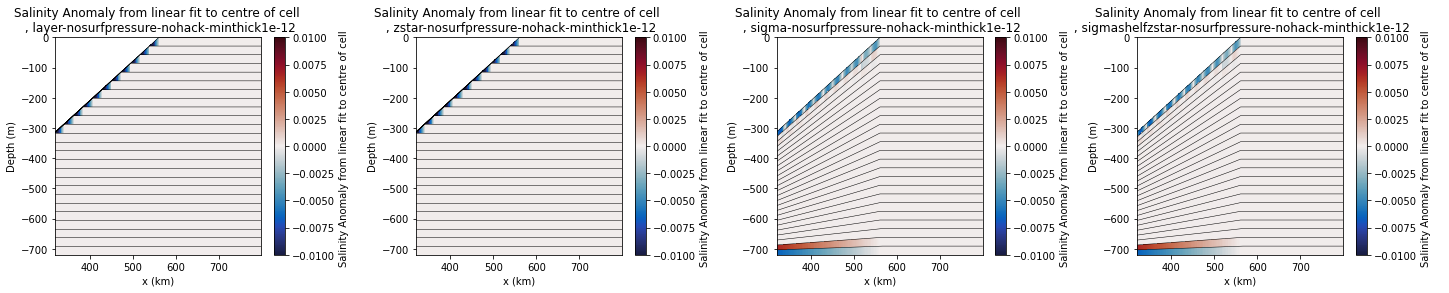

In [121]:
label = 'layer-nosurfpressure-nohack-minthick1e-12'

fig, axes = plt.subplots(ncols = 4, figsize = (24,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8
plot(axes[0],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

label = 'zstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

label = 'sigma-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8
plot(axes[2],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

label = 'sigmashelfzstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8
plot(axes[3],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_3605/2118687101.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_3605/2118687101.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

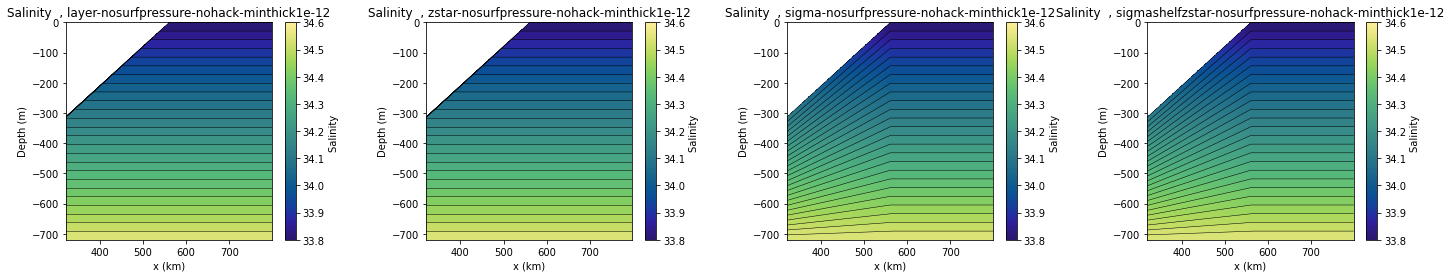

In [117]:
label = 'layer-nosurfpressure-nohack-minthick1e-12'

fig, axes = plt.subplots(ncols = 4, figsize = (24,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
plot(axes[0],x,time,0,IC.Salt,"Salinity ",33.8,34.6,cm.cm.haline,ymax)

label = 'zstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
plot(axes[1],x,time,0,IC.Salt,"Salinity ",33.8,34.6,cm.cm.haline,ymax)

label = 'sigma-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
plot(axes[2],x,time,0,IC.Salt,"Salinity ",33.8,34.6,cm.cm.haline,ymax)

label = 'sigmashelfzstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
plot(axes[3],x,time,0,IC.Salt,"Salinity ",33.8,34.6,cm.cm.haline,ymax)

fig.subplots_adjust(wspace = 0.4)

In [224]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
#     grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
#                              "y":{"center":"yh","outer":"yq"},
#                              "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_IC(label)
    depth = prog.e
    lon = ocean_static.geolon
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu"): dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_3605/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_3605/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

Text(0.5, 0.98, 'Time = 1 hours')

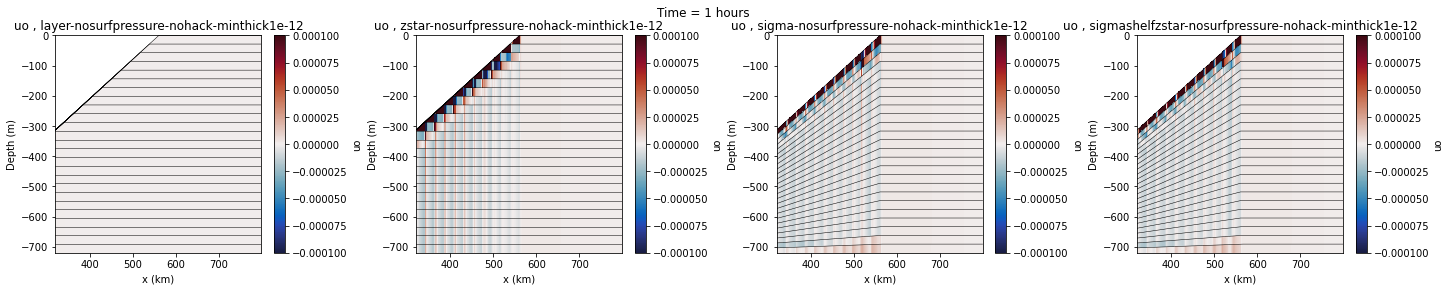

In [131]:
label = 'layer-nosurfpressure-nohack-minthick1e-12'

fig, axes = plt.subplots(ncols = 4, figsize = (24,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-4,1e-4,cm.cm.balance,ymax)

label = 'zstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
plot(axes[1],x,time,0,prog.u,"uo",-1e-4,1e-4,cm.cm.balance,ymax)

label = 'sigma-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
plot(axes[2],x,time,0,prog.u,"uo",-1e-4,1e-4,cm.cm.balance,ymax)

label = 'sigmashelfzstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
plot(axes[3],x,time,0,prog.u,"uo",-1e-4,1e-4,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_3605/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_3605/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

Text(0.5, 0.98, 'Time = 120 hours')

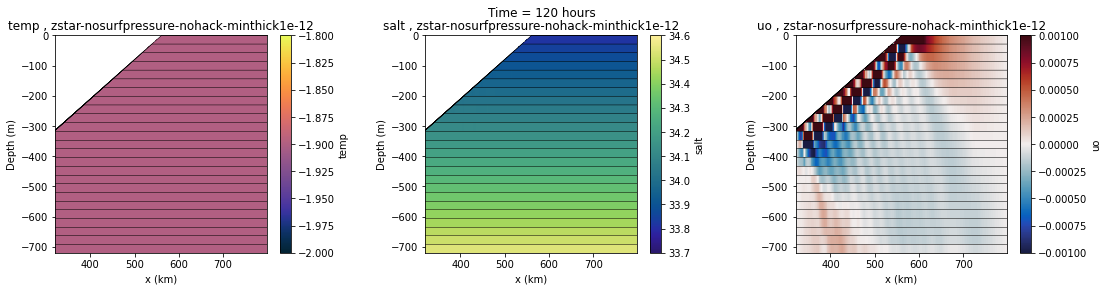

In [141]:
label = 'zstar-nosurfpressure-nohack-minthick1e-12'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.temp,"temp",-2,-1.8,cm.cm.thermal,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[2],x,time,0,prog.u,"uo",-1e-3,1e-3,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

In [142]:
label = 'layer-nosurfpressure-nohack-minthick1e-12'

prog = open_files(label)
IC = open_IC(label)
print(IC.Salt.min().values)
print(IC.Salt.max().values)

33.81499999999998
34.53499999999978


# Now use HACKMODE

after running with `THICKNESS_CONFIG = "ISOMIP"` make ncfile

In [16]:
def make_thickness_file(filename):
    
    ic = xr.open_dataset('MOM_IC.nc')
    _, nz, ny, nx = ic.h.data.shape

    new_thick = nc.Dataset(filename, "w", format="NETCDF4")
    new_thick.createDimension("nz", nz)
    new_thick.createDimension("ny", ny)
    new_thick.createDimension("nx", nx)
    new_thick.createVariable("h","f8",("nz","ny","nx"))

    new_thick["h"][:,:,:] = ic.h.data
    new_thick.close()


In [17]:
make_thickness_file('INPUT/thickness_zstar_surfpressure-minthick1e-12-verticefrontWright.nc')

Now run with hack version of MOM6 and `THICKNESS_CONFIG = "thickness_simpleshelf2_pfile.nc"` by changing `MOM_override` 

(TODO: make the two runs and editing MOM_override happen automatically with a bash script)

Now plot the results and compare to the original with the salt/thickness bug.

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_3605/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_3605/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

Text(0.5, 0.98, 'Time = 1 hours')

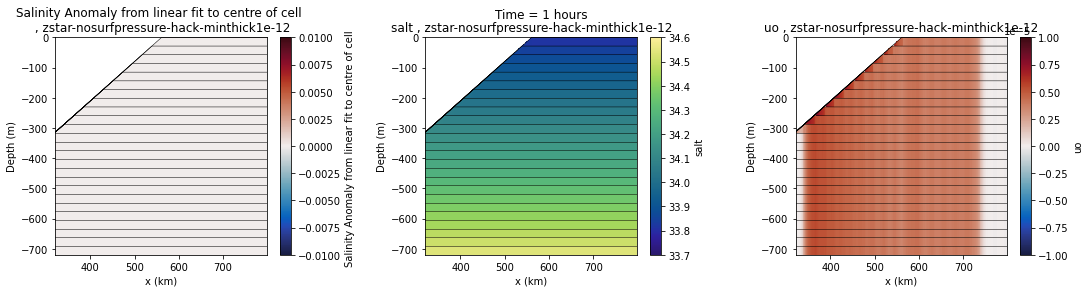

In [181]:
label = 'zstar-nosurfpressure-hack-minthick1e-12'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8

plot(axes[0],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[2],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/4272908918.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/4272908918.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

Text(0.5, 0.98, 'Time = 1 hours')

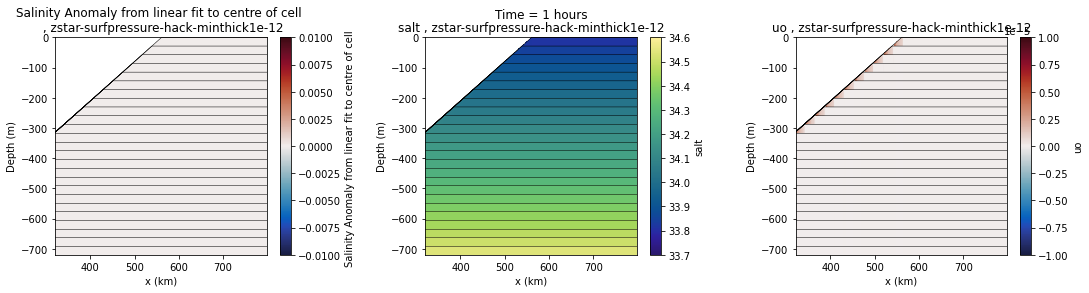

In [262]:
label = 'zstar-surfpressure-hack-minthick1e-12'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8

plot(axes[0],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[2],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

layer time ave mean u = 3.34949204542464e-08


Text(0.5, 0.98, 'calc_sfc_displacement initialization')

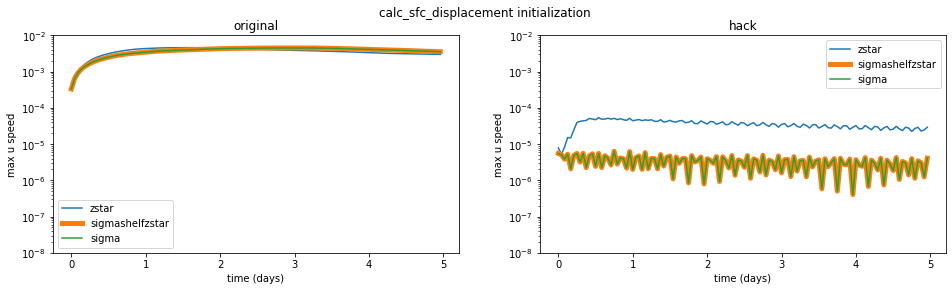

In [46]:
## Plot velocities
fig, axes = plt.subplots(ncols = 2, figsize = (16,4))

label = 'layer-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
# axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 
print('layer time ave mean u = '+str(np.abs(prog.u).max(['zl','yh','xq']).mean('Time').values))

label = 'zstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigmashelfzstar-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigmashelfzstar', linewidth = 5) 

label = 'sigma-nosurfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 
axes[0].set_ylabel('max u speed')
axes[0].set_xlabel('time (days)')

axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_ylim(1e-8,1e-2)

axes[0].set_title('original')
###########

# label = 'layer-nosurfpressure-hack-minthick1e-12'
# prog = open_files(label)
# axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-nosurfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigmashelfzstar-nosurfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigmashelfzstar', linewidth = 5) 

label = 'sigma-nosurfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 
axes[1].set_ylabel('max u speed')
axes[1].set_xlabel('time (days)')

axes[1].legend()
axes[1].set_yscale('log')
axes[1].set_title('hack')
axes[1].set_ylim(1e-8,1e-2)
fig.suptitle('calc_sfc_displacement initialization')

layer time ave mean u = 3.5389927678345724e-11


Text(0.5, 0.98, 'using surface pressure file rather than ice depression (trim_ic_for_p_surf)')

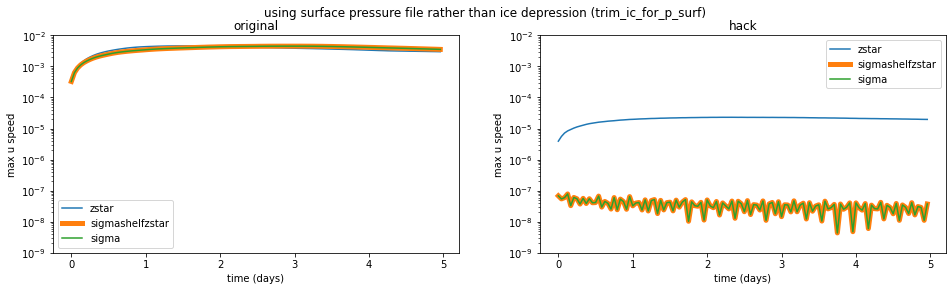

In [48]:
## Plot velocities
fig, axes = plt.subplots(ncols = 2, figsize = (16,4))

label = 'layer-surfpressure-nohack-minthick1e-12'
prog = open_files(label)
#axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 
print('layer time ave mean u = '+str(np.abs(prog.u).max(['zl','yh','xq']).mean('Time').values))
label = 'zstar-surfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigmashelfzstar-surfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigmashelfzstar', linewidth = 5) 

label = 'sigma-surfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 
axes[0].set_ylabel('max u speed')
axes[0].set_xlabel('time (days)')

axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_title('original')
axes[0].set_ylim(1e-9,1e-2)

###########

# label = 'layer-nosurfpressure-hack-minthick1e-12'
# prog = open_files(label)
# axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigmashelfzstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigmashelfzstar', linewidth = 5) 

label = 'sigma-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 
axes[1].set_ylabel('max u speed')
axes[1].set_xlabel('time (days)')

axes[1].legend()
axes[1].set_yscale('log')
axes[1].set_title('hack')
axes[1].set_ylim(1e-9,1e-2)

fig.suptitle('using surface pressure file rather than ice depression (trim_ic_for_p_surf)')

# Now add some simple topography

In [16]:
depth = np.zeros([2,240])
ny = np.arange(2)
nx = np.arange(240)
# create xarray dataset
ds = xr.Dataset(
    data_vars=dict(
        depth=(["ny", "nx"], depth),
    ),
#    coords=dict(
#        nx=(["nx"], nx),
#        ny=(["ny"], ny),
#    ),
    #attrs=dict(description="Depth of topography"),
)
ds

<xarray.Dataset>
Dimensions:  (ny: 2, nx: 240)
Dimensions without coordinates: ny, nx
Data variables:
    depth    (ny, nx) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [17]:
test_file = xr.open_dataset('archive/MOM_IC-layer-surfpressure-nohack-minthick1e-12.nc')
min_depth = -test_file.eta.isel(lonh = 0).max().values
min_depth

313.35733453242636

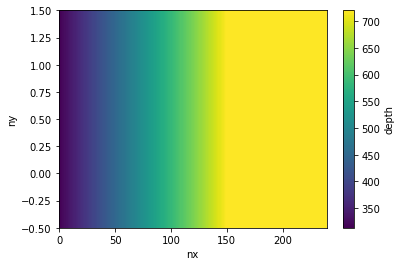

In [18]:
ds['depth'] = (720-min_depth)/150*(ds.depth+ds.nx)+min_depth
ds['depth'] = ds.depth.where(ds.depth<720).fillna(720)

ds.depth.plot()

In [19]:
ds.to_netcdf('INPUT/topog_2D.nc')

Now do similar tests with different coordinates with this topography.

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

Text(0.5, 0.98, 'Time = 1 hours')

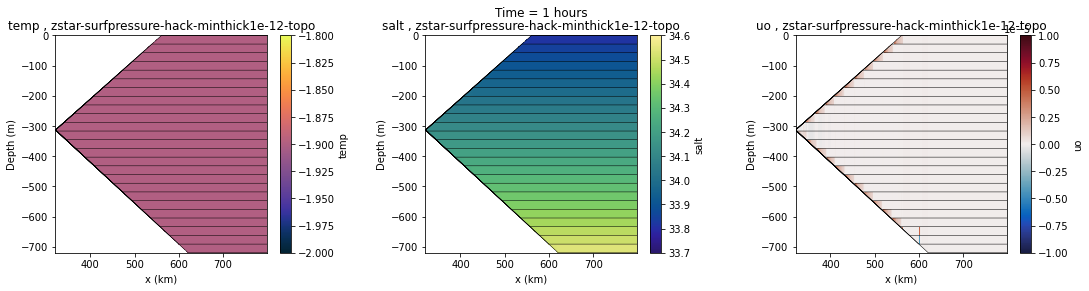

In [36]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.temp,"temp",-2,-1.8,cm.cm.thermal,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[2],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

Text(0.5, 0.98, 'Topography with grounding line')

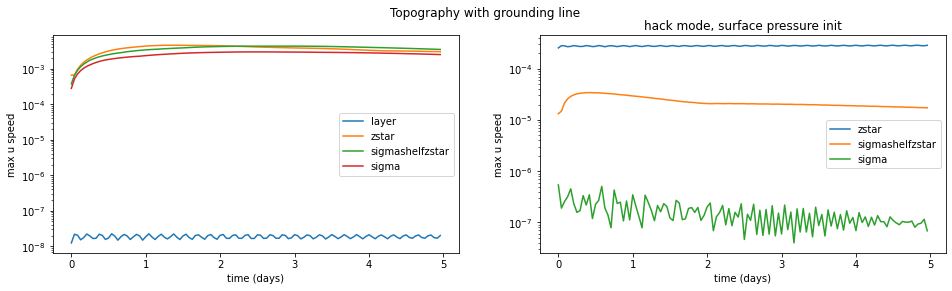

In [32]:
## Plot velocities
fig, axes = plt.subplots(ncols = 2, figsize = (16,4))

label = 'layer-surfpressure-nohack-minthick1e-12-topo'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-surfpressure-nohack-minthick1e-12-topo'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigmashelfzstar-surfpressure-nohack-minthick1e-12-topo'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigmashelfzstar') 

label = 'sigma-surfpressure-nohack-minthick1e-12-topo'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 

axes[0].set_ylabel('max u speed')
axes[0].set_xlabel('time (days)')
axes[0].set_yscale('log')
axes[0].legend()
###########

# label = 'layer-surfpressure-nohack-minthick1e-12-topo'
# prog = open_files(label)
# axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-surfpressure-hack-minthick1e-12-topo'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigmashelfzstar-surfpressure-hack-minthick1e-12-topo'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigmashelfzstar') 

label = 'sigma-surfpressure-hack-minthick1e-12-topo'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 
axes[1].set_ylabel('max u speed')
axes[1].set_xlabel('time (days)')

axes[1].legend()
axes[1].set_title('hack mode, surface pressure init')
axes[1].set_yscale('log')

fig.suptitle('Topography with grounding line')

Text(0.5, 0.98, 'hack mode for ALE coords')

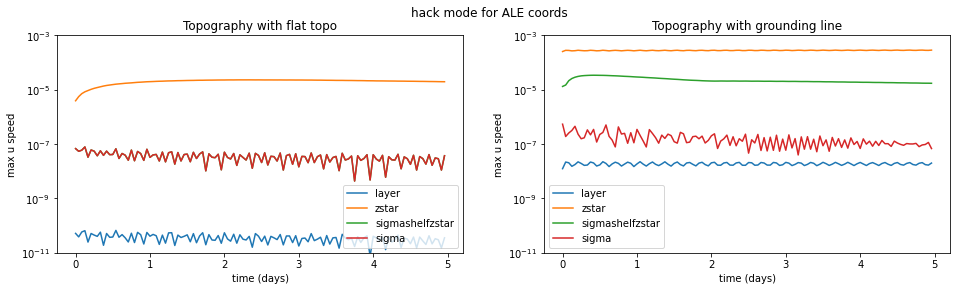

In [44]:
## Plot velocities
fig, axes = plt.subplots(ncols = 2, figsize = (16,4))

label = 'layer-surfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigmashelfzstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigmashelfzstar') 

label = 'sigma-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 

axes[0].set_ylabel('max u speed')
axes[0].set_xlabel('time (days)')
axes[0].set_yscale('log')
axes[0].set_ylim(1e-11,1e-3)
axes[0].set_title('Topography with flat topo')

axes[0].legend()
###########

label = 'layer-surfpressure-nohack-minthick1e-12-topo'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-surfpressure-hack-minthick1e-12-topo'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigmashelfzstar-surfpressure-hack-minthick1e-12-topo'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigmashelfzstar') 

label = 'sigma-surfpressure-hack-minthick1e-12-topo'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 
axes[1].set_ylabel('max u speed')
axes[1].set_xlabel('time (days)')

axes[1].legend()
axes[1].set_title('Topography with grounding line')
axes[1].set_yscale('log')
axes[1].set_ylim(1e-11,1e-3)

fig.suptitle('hack mode for ALE coords')

In [30]:
make_thickness_file('INPUT/thickness_sigma_surfpressure-minthick1e-12-topo.nc')

In [38]:
label = 'sigma-surfpressure-hack-minthick1e-12-topo'
prog = open_files(label)
prog.e.isel(xh = 0,Time = 0, yh = 0).max().values-prog.e.isel(xh = 0,Time = 0, yh = 0).min().values

2.4996893444040325e-09

In [41]:
prog.h.isel(xh = 0,Time = 0, yh = 0,zl = 0).values

array(1.e-10)

# Now add ice front thickness 
### (and revert to flat bottom)

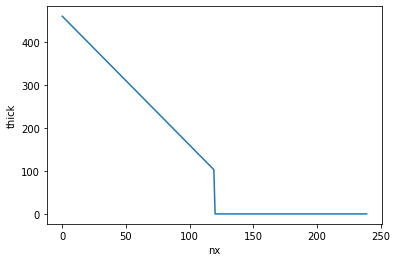

In [53]:
IceFrontThick = xr.open_dataset('INPUT/TwoDtrianglethick.nc')
IceFrontThick['thick'] = IceFrontThick.thick+100
IceFrontThick['thick'] = IceFrontThick.thick.where(IceFrontThick.thick >100).fillna(0)
IceFrontThick.thick.isel(ny = 0).plot()

In [54]:
IceFrontThick.to_netcdf('INPUT/TwoDtrianglethick_verticefront.nc')

Smoother version

(114.0, 125.0)

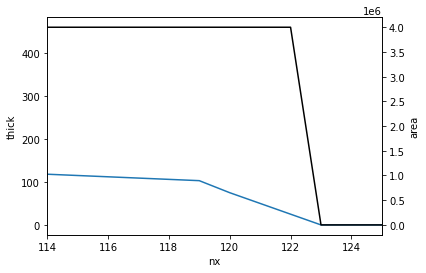

In [91]:
fig, ax = plt.subplots()
IceFrontThick = xr.open_dataset('INPUT/TwoDtrianglethick_verticefront.nc')
IceFrontThick['thick'][:,120] = 75
IceFrontThick['thick'][:,121] = 50
IceFrontThick['thick'][:,122] = 25
IceFrontThick['area'][:,120:123] = 2e3**2
IceFrontThick.thick.isel(ny = 0).plot()
ax2 = ax.twinx()
IceFrontThick.area.isel(ny = 0).plot(ax = ax2, color = 'k', label = 'area')

plt.xlim(114,125)

In [92]:
IceFrontThick.to_netcdf('INPUT/TwoDtrianglethick_4stepicefront.nc')

Now run

In [96]:
make_thickness_file('INPUT/thickness_zstar_surfpressure-minthick1e-12-4stepicefront.nc')

Text(0.5, 1.0, '4 step ice front')

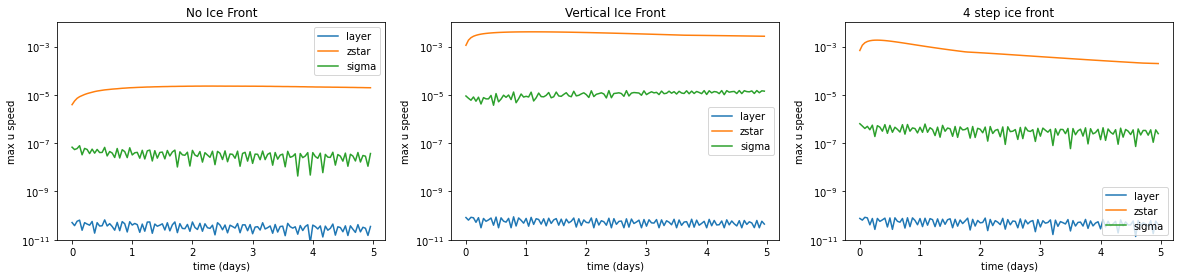

In [99]:
## Plot velocities
fig, axes = plt.subplots(ncols = 3, figsize = (20,4))

label = 'layer-surfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigma-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 

axes[0].set_ylabel('max u speed')
axes[0].set_xlabel('time (days)')
axes[0].set_yscale('log')
axes[0].set_ylim(1e-11,1e-2)
axes[0].set_title('No Ice Front')
axes[0].legend()


label = 'layer-surfpressure-nohack-minthick1e-12-verticefront'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-surfpressure-hack-minthick1e-12-verticefront'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigma-surfpressure-hack-minthick1e-12-verticefront'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 

axes[1].set_ylabel('max u speed')
axes[1].set_xlabel('time (days)')
axes[1].set_yscale('log')
axes[1].set_ylim(1e-11,1e-2)
axes[1].set_title('Vertical Ice Front')
axes[1].legend()
###########

label = 'layer-surfpressure-nohack-minthick1e-12-4stepicefront'
prog = open_files(label)
axes[2].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'layer') 

label = 'zstar-surfpressure-hack-minthick1e-12-4stepicefront'
prog = open_files(label)
axes[2].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

label = 'sigma-surfpressure-hack-minthick1e-12-4stepicefront'
prog = open_files(label)
axes[2].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'sigma') 

axes[2].set_ylabel('max u speed')
axes[2].set_xlabel('time (days)')

axes[2].legend()
axes[2].set_yscale('log')
axes[2].set_ylim(1e-11,1e-2)
axes[2].set_title('4 step ice front')

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

Text(0.5, 0.98, 'Time = 120 hours')

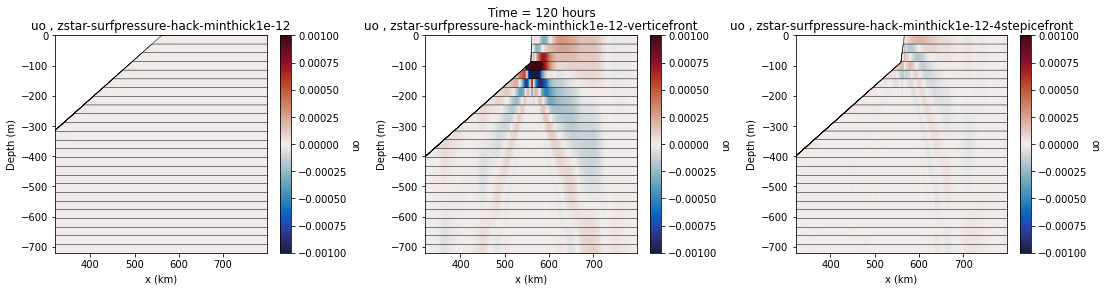

In [102]:
fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
x = 0
time = 24*5-1
ymax = 720

label = 'zstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
IC = open_IC(label)
plot(axes[0],x,time,0,prog.u,"uo",-1e-3,1e-3,cm.cm.balance,ymax)


label = 'zstar-surfpressure-hack-minthick1e-12-verticefront'
prog = open_files(label)
IC = open_IC(label)
plot(axes[1],x,time,0,prog.u,"uo",-1e-3,1e-3,cm.cm.balance,ymax)

label = 'zstar-surfpressure-hack-minthick1e-12-4stepicefront'
prog = open_files(label)
IC = open_IC(label)
plot(axes[2],x,time,0,prog.u,"uo",-1e-3,1e-3,cm.cm.balance,ymax)


fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

# Try Non-Boussinesq mode

With `#override BOUSSINESQ = False`

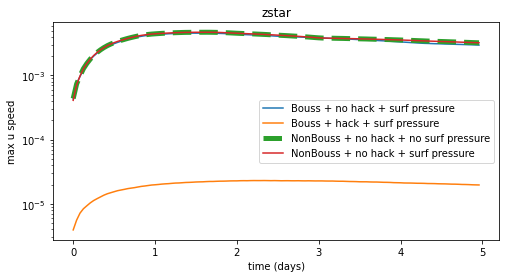

In [110]:
## Plot velocities
fig, axes = plt.subplots(ncols = 1, figsize = (8,4))

label = 'zstar-surfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'Bouss + no hack + surf pressure') 

label = 'zstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'Bouss + hack + surf pressure') 


label = 'zstar-nosurfpressure-nohack-minthick1e-12-nonbouss'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'NonBouss + no hack + no surf pressure', linewidth = 5, linestyle = '--') 

label = 'zstar-surfpressure-nohack-minthick1e-12-nonbouss'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'NonBouss + no hack + surf pressure') 

axes.set_ylabel('max u speed')
axes.set_xlabel('time (days)')
axes.set_yscale('log')
#axes.set_ylim(1e-11,1e-2)
axes.set_title('zstar')
axes.legend()


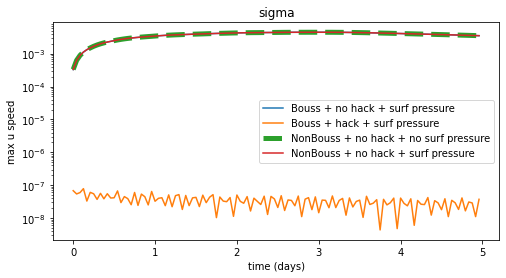

In [113]:
## Plot velocities
fig, axes = plt.subplots(ncols = 1, figsize = (8,4))

label = 'sigma-surfpressure-nohack-minthick1e-12'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'Bouss + no hack + surf pressure') 

label = 'sigma-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'Bouss + hack + surf pressure') 


label = 'sigma-nosurfpressure-nohack-minthick1e-12-nonbouss'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'NonBouss + no hack + no surf pressure', linewidth = 5, linestyle = '--') 

label = 'sigma-surfpressure-nohack-minthick1e-12-nonbouss'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'NonBouss + no hack + surf pressure') 

axes.set_ylabel('max u speed')
axes.set_xlabel('time (days)')
axes.set_yscale('log')
#axes.set_ylim(1e-11,1e-2)
axes.set_title('sigma')
axes.legend()


In [108]:
#try hack
make_thickness_file('INPUT/thickness_zstar_surfpressure-minthick1e-12-nonbouss.nc')


Hack Mode with zstar + surf pressure + nonBouss crashes with error

`FATAL from PE     1: write_energy : Excessive energy per unit mass forced model termination.`

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

Text(0.5, 0.98, 'Time = 1 hours')

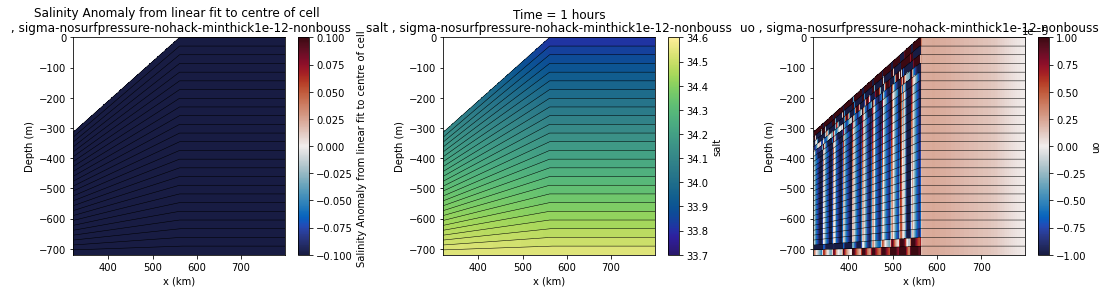

In [115]:
label = 'sigma-nosurfpressure-nohack-minthick1e-12-nonbouss'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8

plot(axes[0],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-1,1e-1,cm.cm.balance,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[2],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

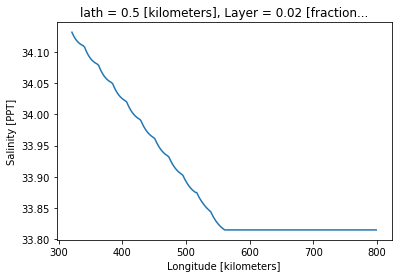

In [124]:
IC.Salt.isel(Layer = 0,lath = 0).plot()

# Timestep 

Let's go back to the zstar, surface pressure version, flat bottom, Boussinesq simulation with hack mode and try to see what happens if we change the timestep. I set `DT = DTTHERM = DT_FORCING = 30` and `DT_BT = -0.9` rather than 300.

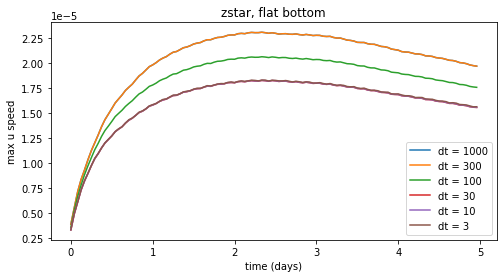

In [149]:
## Plot velocities
fig, axes = plt.subplots(ncols = 1, figsize = (8,4))

label = 'zstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 1000') 

label = 'zstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 300') 

label = 'zstar-surfpressure-hack-minthick1e-12-dt100'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 100') 

label = 'zstar-surfpressure-hack-minthick1e-12-dt30'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 30') 

label = 'zstar-surfpressure-hack-minthick1e-12-dt10'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 10') 

label = 'zstar-surfpressure-hack-minthick1e-12-dt3'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 3') 

axes.set_ylabel('max u speed')
axes.set_xlabel('time (days)')
#axes.set_yscale('log')
#axes.set_ylim(1e-11,1e-2)
axes.set_title('zstar, flat bottom')
axes.legend()
#axes.set_ylim(1.55e-5,1.6e-5)

In [138]:
prog.u

<xarray.DataArray 'u' (Time: 120, zl: 25, yh: 2, xq: 241)>
[1446000 values with dtype=float64]
Coordinates:
  * xq       (xq) float64 320.0 322.0 324.0 326.0 ... 794.0 796.0 798.0 800.0
  * yh       (yh) float64 0.5 1.5
  * zl       (zl) float64 14.4 43.2 72.0 100.8 129.6 ... 619.2 648.0 676.8 705.6
  * Time     (Time) object 0001-01-01 01:00:00 ... 0001-01-06 00:00:00
Attributes:
    long_name:      Zonal velocity
    units:          m s-1
    cell_methods:   zl:mean yh:mean xq:point time: point
    interp_method:  none

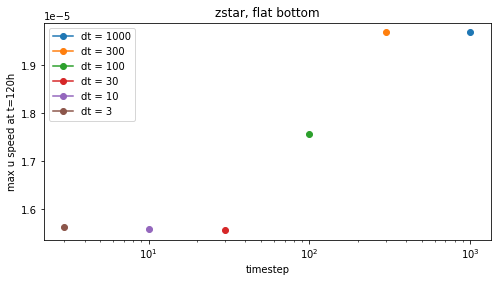

In [142]:
## Plot velocities
fig, axes = plt.subplots(ncols = 1, figsize = (8,4))

label = 'zstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes.plot(1000,np.abs(prog.u.max(['zl','yh','xq']).isel(Time = -1)), marker = 'o',
          label = 'dt = 1000') 

label = 'zstar-surfpressure-hack-minthick1e-12'
prog = open_files(label)
axes.plot(300,np.abs(prog.u.max(['zl','yh','xq']).isel(Time = -1)), marker = 'o',
          label = 'dt = 300') 

label = 'zstar-surfpressure-hack-minthick1e-12-dt100'
prog = open_files(label)
axes.plot(100,np.abs(prog.u.max(['zl','yh','xq']).isel(Time = -1)), marker = 'o',
          label = 'dt = 100') 

label = 'zstar-surfpressure-hack-minthick1e-12-dt30'
prog = open_files(label)
axes.plot(30,np.abs(prog.u.max(['zl','yh','xq']).isel(Time = -1)), marker = 'o',
          label = 'dt = 30') 

label = 'zstar-surfpressure-hack-minthick1e-12-dt10'
prog = open_files(label)
axes.plot(10,np.abs(prog.u.max(['zl','yh','xq']).isel(Time = -1)), marker = 'o',
          label = 'dt = 10') 

label = 'zstar-surfpressure-hack-minthick1e-12-dt3'
prog = open_files(label)
axes.plot(3,np.abs(prog.u.max(['zl','yh','xq']).isel(Time = -1)), marker = 'o',
          label = 'dt = 3') 


axes.set_ylabel('max u speed at t=120h')
axes.set_xlabel('timestep')
#axes.set_yscale('log')
#axes.set_ylim(1e-11,1e-2)
axes.set_title('zstar, flat bottom')
axes.legend()
#axes.set_ylim(1.55e-5,1.6e-5)
axes.set_xscale('log')

Appears to converge by `dt = 30.`

Now try with grounding line, and with terrain-following coords.

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

Text(0.5, 0.98, 'Time = 0 hours')

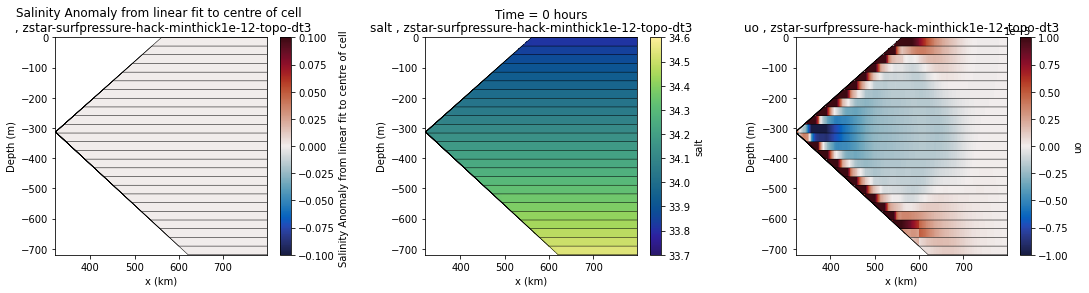

In [147]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt3'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8

plot(axes[0],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-1,1e-1,cm.cm.balance,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

time = -1

plot(axes[2],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

Text(0.5, 0.98, 'Time = 0 hours')

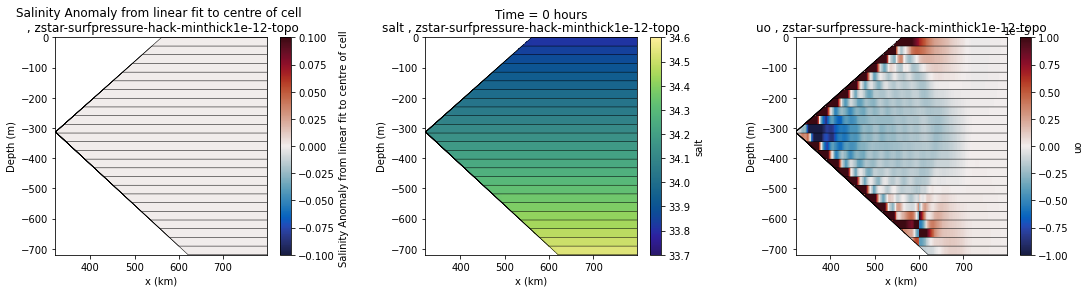

In [148]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8

plot(axes[0],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-1,1e-1,cm.cm.balance,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

time = -1

plot(axes[2],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

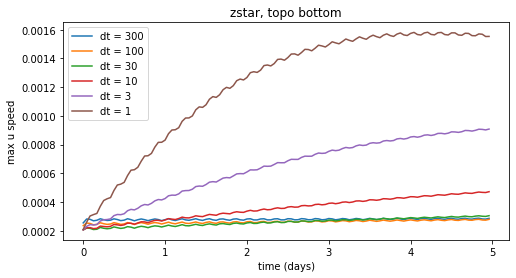

In [278]:
## Plot velocities
fig, axes = plt.subplots(ncols = 1, figsize = (8,4))

# label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt1000'
# prog = open_files(label)
# axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
#           label = 'dt = 1000') 

label = 'zstar-surfpressure-hack-minthick1e-12-topo'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 300') 

label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt100'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 100') 

label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt30'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 30') 

label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt10'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 10') 

label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt3'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 3') 
label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt1'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = 'dt = 1') 

axes.set_ylabel('max u speed')
axes.set_xlabel('time (days)')
#axes.set_yscale('log')
#axes.set_ylim(1e-11,1e-2)
axes.set_title('zstar, topo bottom')
axes.legend()
#axes.set_ylim(1.55e-5,1.6e-5)

# Strange oscillations. And why does u_max go UP with smaller timestep?

## Investigate momentum budget:

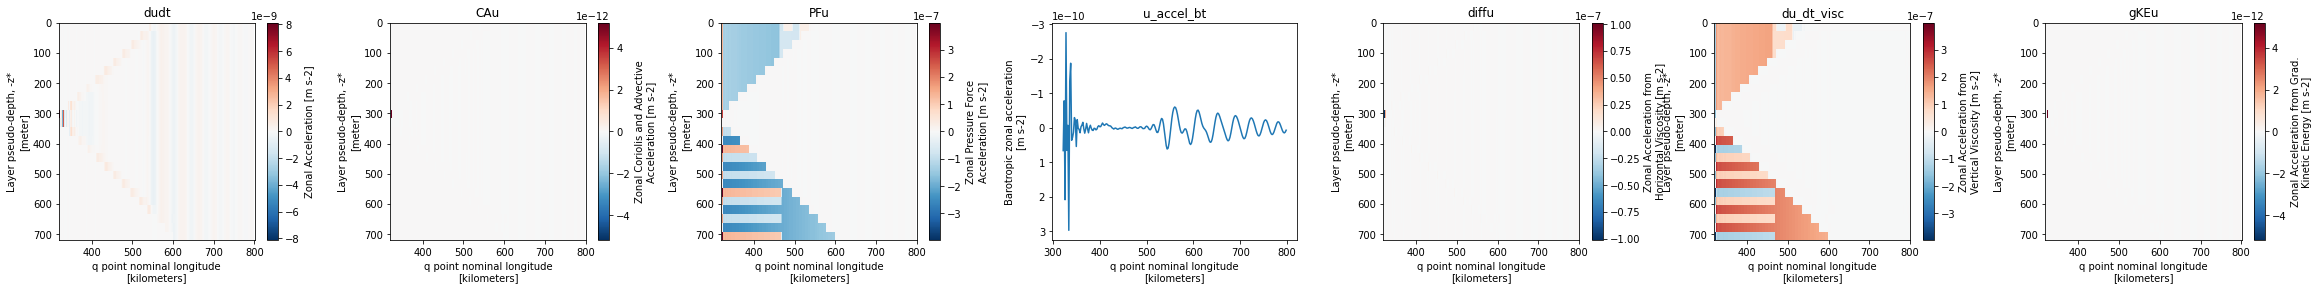

In [164]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt10'
mom = open_mom(label)

time = 0
y = 0

fig, axes = plt.subplots(ncols = 7, figsize= (40,4))
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)
axes[0].set_title('dudt')
mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3], yincrease = False)
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)
axes[6].set_title('gKEu')

fig.subplots_adjust(wspace = 0.35)

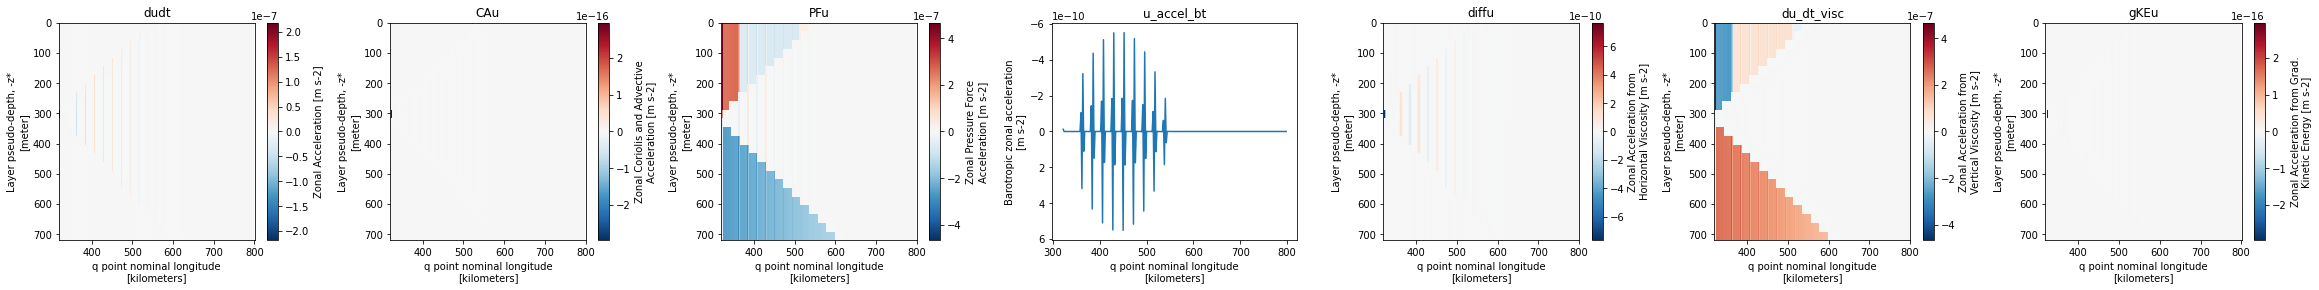

In [165]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt10-10sdiag'
mom = open_mom(label)

time = 0
y = 0

fig, axes = plt.subplots(ncols = 7, figsize= (40,4))
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)
axes[0].set_title('dudt')
mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3], yincrease = False)
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)
axes[6].set_title('gKEu')

fig.subplots_adjust(wspace = 0.35)

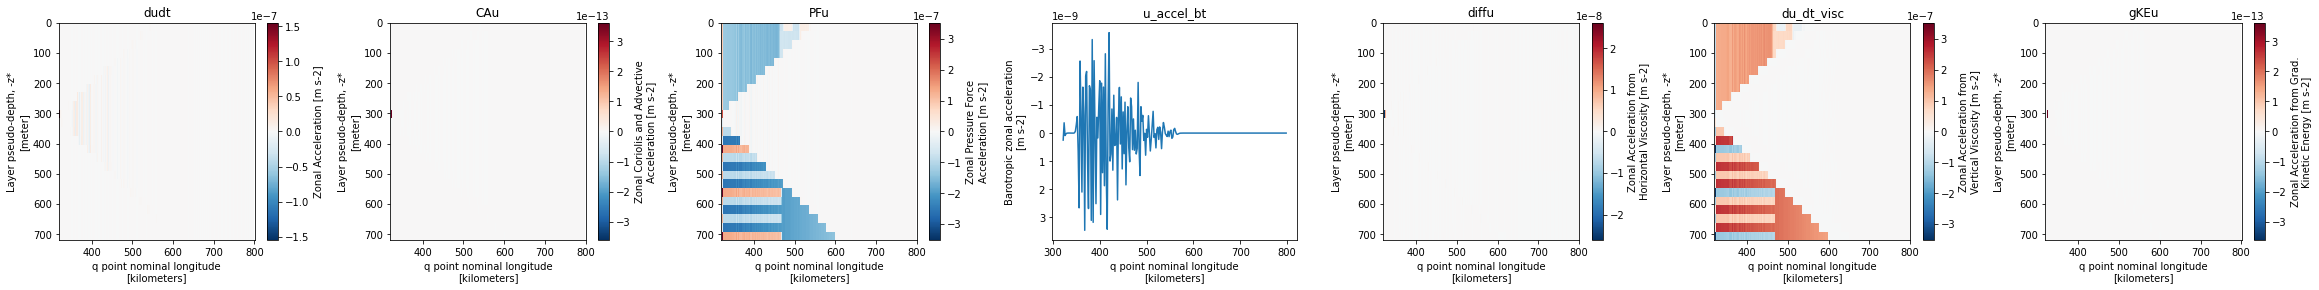

In [174]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt10-10sdiag'
mom = open_mom(label)

time = -1
y = 0

fig, axes = plt.subplots(ncols = 7, figsize= (40,4))
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)
axes[0].set_title('dudt')
mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3], yincrease = False)
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)
axes[6].set_title('gKEu')

fig.subplots_adjust(wspace = 0.35)

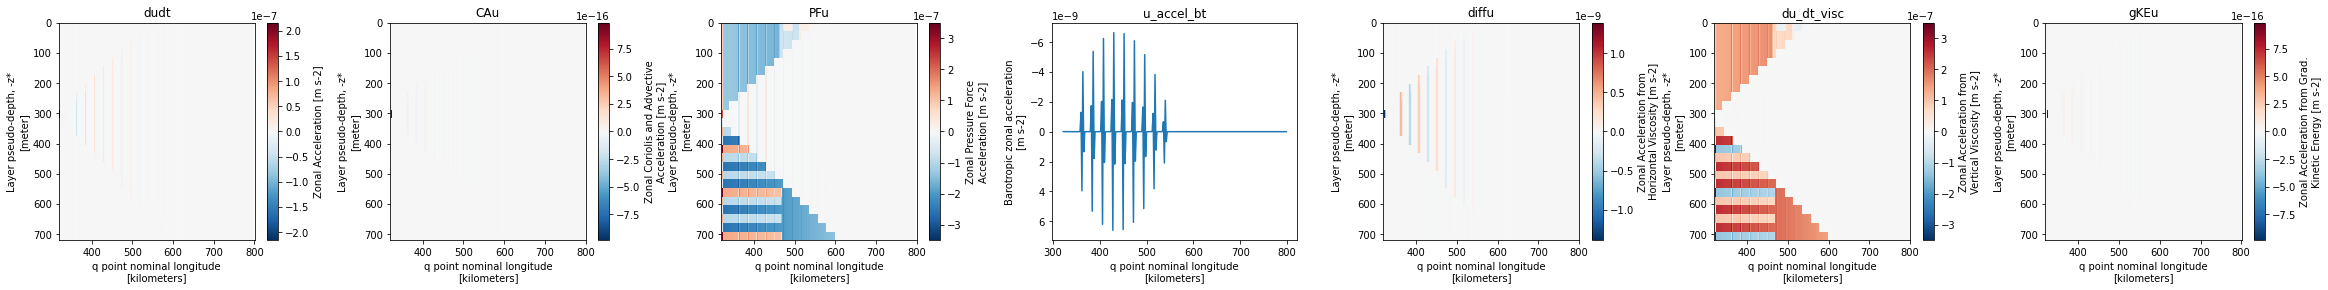

In [166]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt10-10sdiag'
mom = open_mom(label)

time = 1
y = 0

fig, axes = plt.subplots(ncols = 7, figsize= (40,4))
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)
axes[0].set_title('dudt')
mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3], yincrease = False)
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)
axes[6].set_title('gKEu')

fig.subplots_adjust(wspace = 0.35)

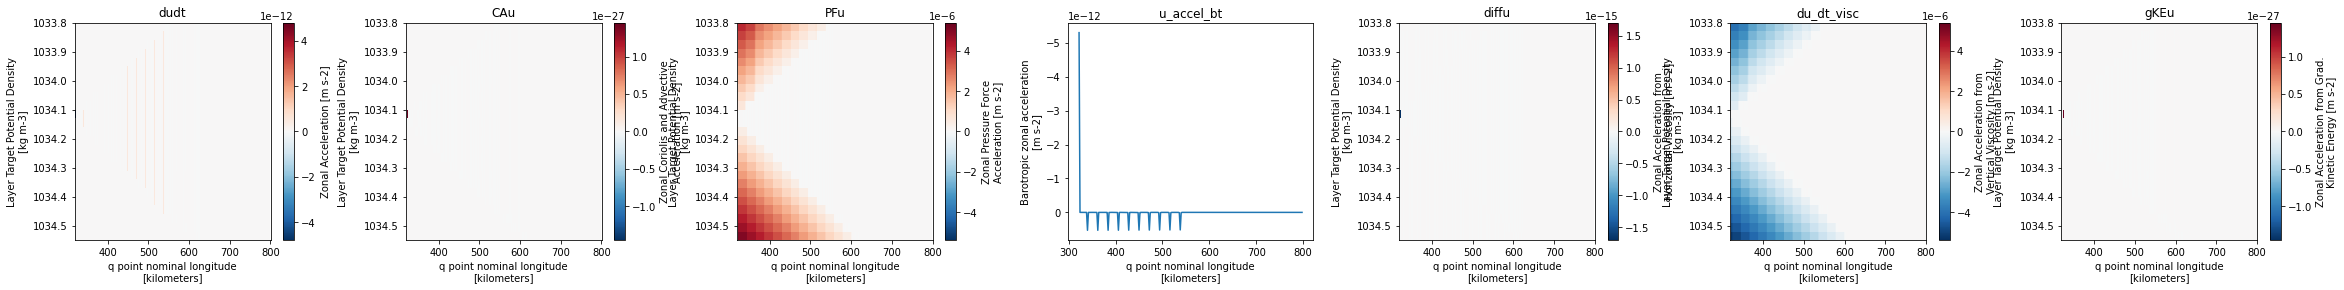

In [169]:
label = 'layer-surfpressure-nohack-minthick1e-12-topo-dt10-10sdiag'
mom = open_mom(label)

time = 0
y = 0

fig, axes = plt.subplots(ncols = 7, figsize= (40,4))
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)
axes[0].set_title('dudt')
mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3], yincrease = False)
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)
axes[6].set_title('gKEu')

fig.subplots_adjust(wspace = 0.35)

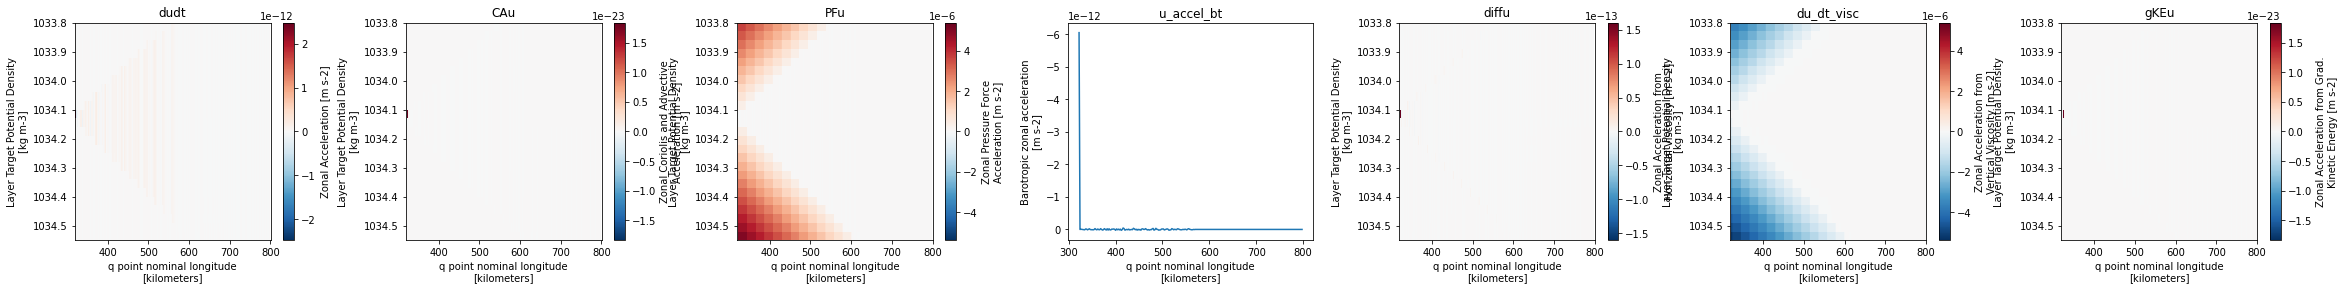

In [175]:
label = 'layer-surfpressure-nohack-minthick1e-12-topo-dt10-10sdiag'
mom = open_mom(label)

time = -1
y = 0

fig, axes = plt.subplots(ncols = 7, figsize= (40,4))
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)
axes[0].set_title('dudt')
mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3], yincrease = False)
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)
axes[6].set_title('gKEu')

fig.subplots_adjust(wspace = 0.35)

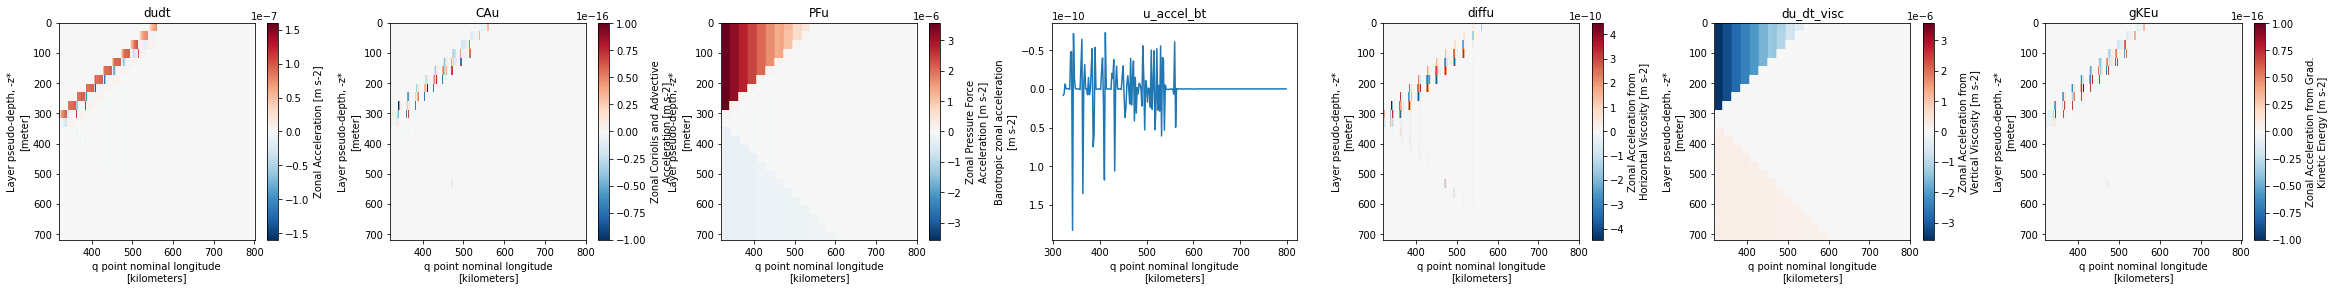

In [173]:
label = 'zstar-nosurfpressure-nohack-minthick1e-12-topo-dt10-10sdiag'
mom = open_mom(label)

time = 0
y = 0

fig, axes = plt.subplots(ncols = 7, figsize= (40,4))
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)
axes[0].set_title('dudt')
mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3], yincrease = False)
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)
axes[6].set_title('gKEu')

fig.subplots_adjust(wspace = 0.35)

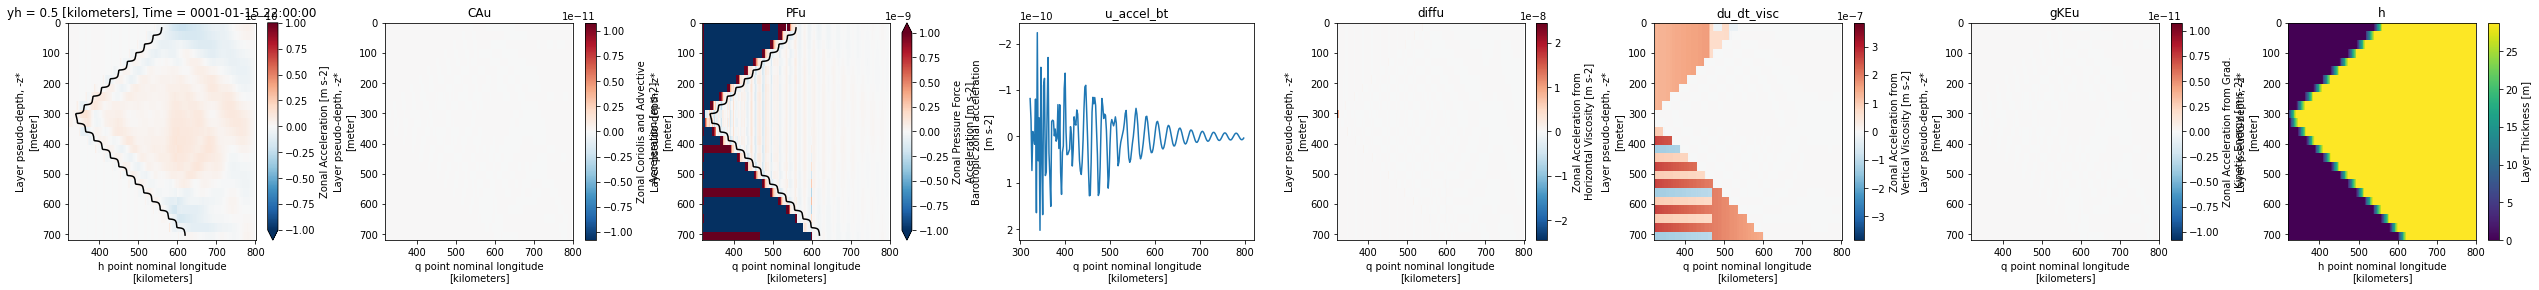

In [256]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo-15d'
mom = open_mom(label)
prog = open_files(label)
time = -3
y = 0

fig, axes = plt.subplots(ncols = 8, figsize= (44,4))
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False, vmin = -1e-10, vmax = 1e-10, cmap = 'RdBu_r')
axes[0].set_title('dudt')
prog.h.isel(Time = time, yh = y).plot.contour(ax = axes[0], yincrease = False, levels = [27], colors = 'k')
prog.h.isel(Time = time, yh = y).plot.contour(ax = axes[2], yincrease = False, levels = [27], colors = 'k')

mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False, vmin = -1e-9, vmax = 1e-9, cmap = 'RdBu_r')
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3], yincrease = False)
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)
axes[6].set_title('gKEu')
prog.h.isel(Time = time, yh = y).plot(ax = axes[7], yincrease = False)
axes[7].set_title('h')


fig.subplots_adjust(wspace = 0.35)

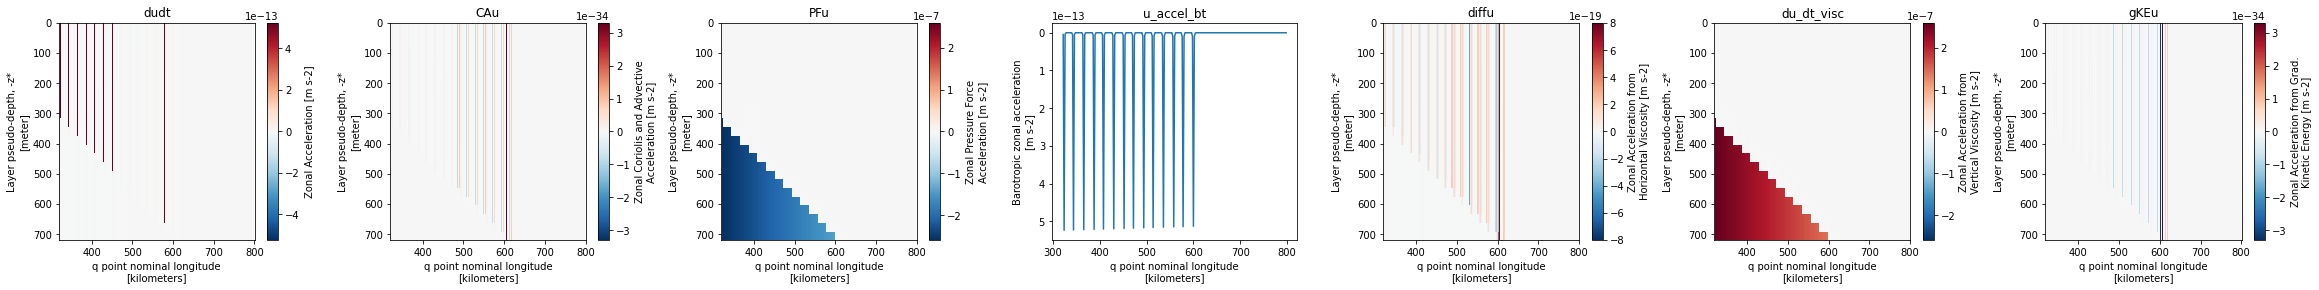

In [190]:
label = 'zstar-nosurfpressure-nohack-minthick1e-12-topo-dt10-10sdiag-noshelf'
mom = open_mom(label)

time = 0
y = 0

fig, axes = plt.subplots(ncols = 7, figsize= (40,4))
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)
axes[0].set_title('dudt')
mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3], yincrease = False)
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)
axes[6].set_title('gKEu')

fig.subplots_adjust(wspace = 0.35)

What is layer pseudodepth?

In [170]:
mom

<xarray.Dataset>
Dimensions:     (xq: 241, yh: 2, zl: 25, Time: 30, xh: 240, yq: 3)
Coordinates:
  * xq          (xq) float64 320.0 322.0 324.0 326.0 ... 794.0 796.0 798.0 800.0
  * yh          (yh) float64 0.5 1.5
  * zl          (zl) float64 1.034e+03 1.034e+03 ... 1.035e+03 1.035e+03
  * Time        (Time) object 0001-01-01 00:00:10 ... 0001-01-01 00:05:00
  * xh          (xh) float64 321.0 323.0 325.0 327.0 ... 793.0 795.0 797.0 799.0
  * yq          (yq) float64 0.0 1.0 2.0
Data variables: (12/18)
    dudt        (Time, zl, yh, xq) float64 ...
    dvdt        (Time, zl, yq, xh) float64 ...
    CAu         (Time, zl, yh, xq) float64 ...
    CAv         (Time, zl, yq, xh) float64 ...
    PFu         (Time, zl, yh, xq) float64 ...
    PFv         (Time, zl, yq, xh) float64 ...
    ...          ...
    dudt_dia    (Time, zl, yh, xq) float64 ...
    dvdt_dia    (Time, zl, yq, xh) float64 ...
    gKEu        (Time, zl, yh, xq) float64 ...
    gKEv        (Time, zl, yq, xh) float64 ...
    rvxu        (Time, zl, yq, xh) float64 ...
    rvxv        (Time, zl, yh, xq) float64 ...
Attributes:
    filename:   mom.nc
    title:      GOLD Experiment
    grid_type:  regular
    grid_tile:  N/A

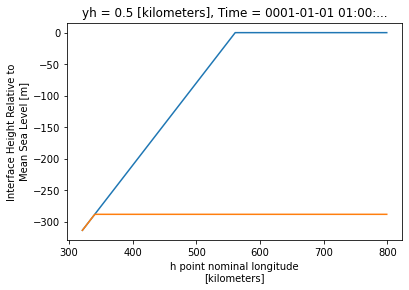

In [187]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt10'
prog = open_files(label)
prog.e.isel(Time = 0, yh = 0,zi = 0).plot()
prog.e.isel(Time = 0, yh = 0,zi = 10).plot()

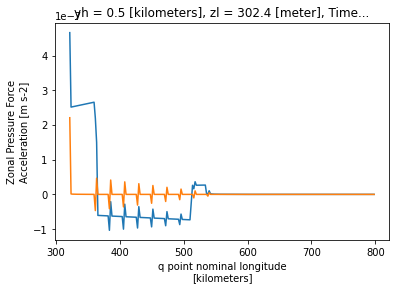

In [189]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo-dt10-10sdiag'
mom = open_mom(label)
mom.PFu.isel(Time = 0, yh = 0,zl = 0).plot()
mom.PFu.isel(Time = 0, yh = 0,zl = 10).plot()


# Make Video



In [192]:
from matplotlib import pyplot as plt, animation
%matplotlib inline

# This is needed to display graphics calculated outside of jupyter notebook
from IPython.display import HTML, display
# this is to make sure there is no size limit
import matplotlib

matplotlib.rcParams['animation.embed_limit'] = 2**128


In [225]:
def plot_nocbar(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
#     grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
#                              "y":{"center":"yh","outer":"yq"},
#                              "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_IC(label)
    depth = prog.e
    lon = ocean_static.geolon
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu"): dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    #plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


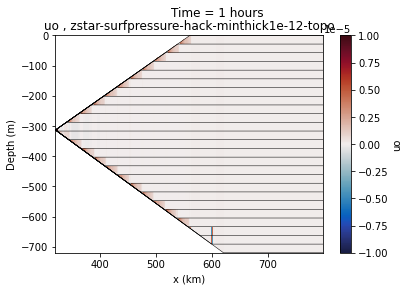

In [210]:
# Get a handle on the figure and the axes

# Plot the initial frame. 
label = 'zstar-surfpressure-hack-minthick1e-12-topo'

fig, axes = plt.subplots(figsize = (6,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720

plot(axes,x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    plot_nocbar(axes,x,frame,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
    fig.suptitle('Time = '+str(frame+1)+' hours')

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=24,       # Could also be iterable or list
    interval=100     # ms between frames
)

In [212]:
#save!
writergif = animation.PillowWriter(fps=5) 

path = 'video/'+label+'u_1hr.gif'
ani.save(path,writer=writergif, dpi = 300)

#display(HTML("<video controls><source src="+path+" type='video/mp4'></video>"))


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/1659384913.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/1659384913.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/1659384913.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/1659384913.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/1659384913.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/1659384913.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/1659384913.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

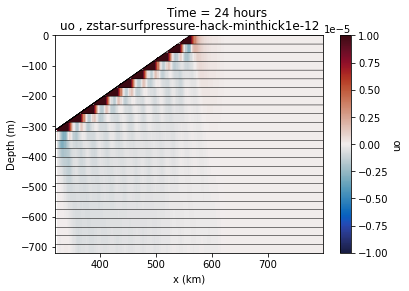

In [213]:
# Get a handle on the figure and the axes

# Plot the initial frame. 
label = 'zstar-surfpressure-hack-minthick1e-12'

fig, axes = plt.subplots(figsize = (6,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720

plot(axes,x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    plot_nocbar(axes,x,frame,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
    fig.suptitle('Time = '+str(frame+1)+' hours')

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=24,       # Could also be iterable or list
    interval=100     # ms between frames
)
#save!
writergif = animation.PillowWriter(fps=5) 

path = 'video/'+label+'u_1hr.gif'
ani.save(path,writer=writergif, dpi = 300)


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/3869821178.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/1659384913.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/1659384913.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/1659384913.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

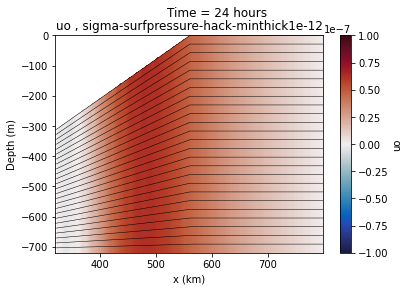

In [217]:
# Get a handle on the figure and the axes

# Plot the initial frame. 
label = 'sigma-surfpressure-hack-minthick1e-12'

fig, axes = plt.subplots(figsize = (6,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720

plot(axes,x,time,0,prog.u,"uo",-1e-7,1e-7,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    plot_nocbar(axes,x,frame,0,prog.u,"uo",-1e-7,1e-7,cm.cm.balance,ymax)
    fig.suptitle('Time = '+str(frame+1)+' hours')

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=24,       # Could also be iterable or list
    interval=100     # ms between frames
)
#save!
writergif = animation.PillowWriter(fps=2) 

path = 'video/'+label+'u_1hr.gif'
ani.save(path,writer=writergif, dpi = 300)


# Video of every timestep

DT = 300S

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/4272908918.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

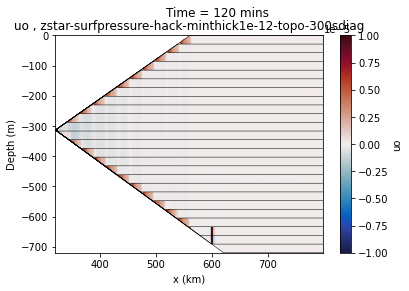

In [231]:
# Get a handle on the figure and the axes

# Plot the initial frame. 
label = 'zstar-surfpressure-hack-minthick1e-12-topo-300sdiag'

fig, axes = plt.subplots(figsize = (6,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720

plot(axes,x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str((time+1)*5)+' mins')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    plot_nocbar(axes,x,frame,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
    fig.suptitle('Time = '+str((frame+1)*5)+' mins')

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=24,       # Could also be iterable or list
    interval=100     # ms between frames
)
#save!
writergif = animation.PillowWriter(fps=2) 

path = 'video/'+label+'u_300s.gif'
ani.save(path,writer=writergif, dpi = 300)


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/4272908918.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

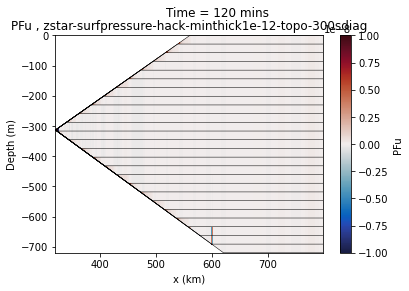

In [232]:
# Get a handle on the figure and the axes

# Plot the initial frame. 
label = 'zstar-surfpressure-hack-minthick1e-12-topo-300sdiag'

fig, axes = plt.subplots(figsize = (6,4))
prog = open_files(label)
IC = open_IC(label)
mom = open_mom(label)

x = 0
time = 0
ymax = 720

plot(axes,x,time,0,mom.PFu,"PFu",-1e-8,1e-8,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str((time+1)*5)+' mins')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    plot_nocbar(axes,x,frame,0,mom.PFu,"PFu",-1e-8,1e-8,cm.cm.balance,ymax)
    fig.suptitle('Time = '+str((frame+1)*5)+' mins')

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=24,       # Could also be iterable or list
    interval=100     # ms between frames
)
#save!
writergif = animation.PillowWriter(fps=2) 

path = 'video/'+label+'PFu_300s.gif'
ani.save(path,writer=writergif, dpi = 300)


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/4272908918.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

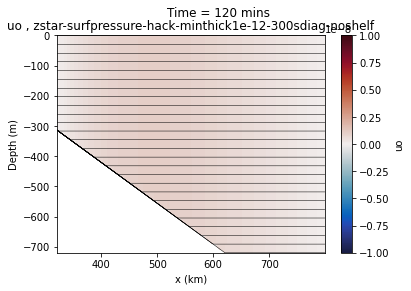

In [235]:
# Get a handle on the figure and the axes

# Plot the initial frame. 
label = 'zstar-surfpressure-hack-minthick1e-12-300sdiag-noshelf'

fig, axes = plt.subplots(figsize = (6,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720

plot(axes,x,time,0,prog.u,"uo",-1e-8,1e-8,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str((time+1)*5)+' mins')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    plot_nocbar(axes,x,frame,0,prog.u,"uo",-1e-8,1e-8,cm.cm.balance,ymax)
    fig.suptitle('Time = '+str((frame+1)*5)+' mins')

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=24,       # Could also be iterable or list
    interval=100     # ms between frames
)
#save!
writergif = animation.PillowWriter(fps=2) 

path = 'video/'+label+'u_300s.gif'
ani.save(path,writer=writergif, dpi = 300)


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/4272908918.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

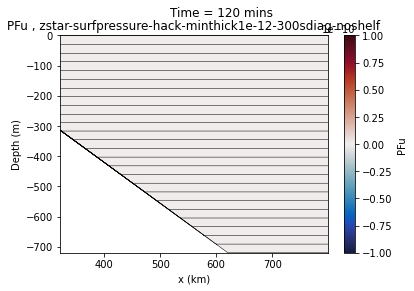

In [236]:
# Get a handle on the figure and the axes

# Plot the initial frame. 
label = 'zstar-surfpressure-hack-minthick1e-12-300sdiag-noshelf'

fig, axes = plt.subplots(figsize = (6,4))
prog = open_files(label)
IC = open_IC(label)
mom = open_mom(label)

x = 0
time = 0
ymax = 720

plot(axes,x,time,0,mom.PFu,"PFu",-1e-10,1e-10,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str((time+1)*5)+' mins')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    plot_nocbar(axes,x,frame,0,mom.PFu,"PFu",-1e-10,1e-10,cm.cm.balance,ymax)
    fig.suptitle('Time = '+str((frame+1)*5)+' mins')

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=24,       # Could also be iterable or list
    interval=100     # ms between frames
)
#save!
writergif = animation.PillowWriter(fps=2) 

path = 'video/'+label+'PFu_300s.gif'
ani.save(path,writer=writergif, dpi = 300)


# 100 Day Run

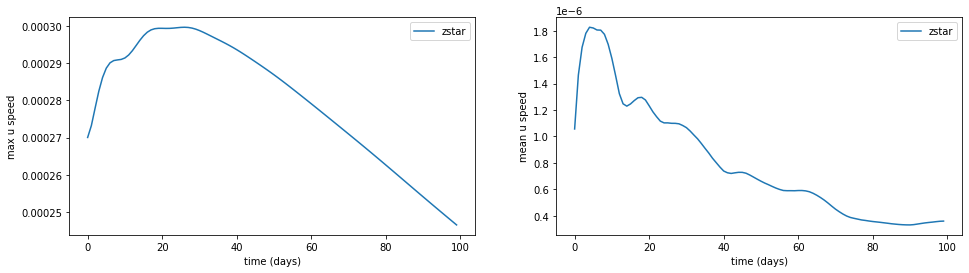

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/4272908918.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_12472/137205600.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

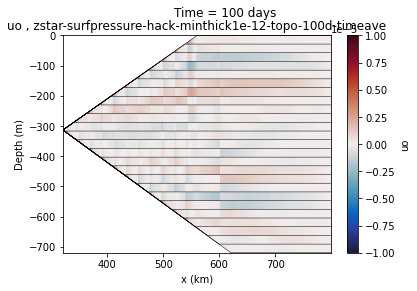

In [265]:
## Plot velocities
fig, axes = plt.subplots(ncols = 2, figsize = (16,4))


label = 'zstar-surfpressure-hack-minthick1e-12-topo-100d-timeave'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time)),np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

axes[0].set_ylabel('max u speed')
axes[0].set_xlabel('time (days)')

axes[0].legend()
axes[1].plot(np.arange(len(prog.Time)),np.abs(prog.u).mean(['zl','yh','xq']), 
             label = 'zstar') 

axes[1].set_ylabel('mean u speed')
axes[1].set_xlabel('time (days)')

axes[1].legend()

plt.show()
fig, axes = plt.subplots(figsize = (6,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720

plot(axes,x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str((time+1))+' days')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    plot_nocbar(axes,x,frame,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
    fig.suptitle('Time = '+str((frame+1))+' days')

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=100,       # Could also be iterable or list
    interval=100     # ms between frames
)
#save!
writergif = animation.PillowWriter(fps=2) 

path = 'video/'+label+'u_1d.gif'
ani.save(path,writer=writergif, dpi = 300)


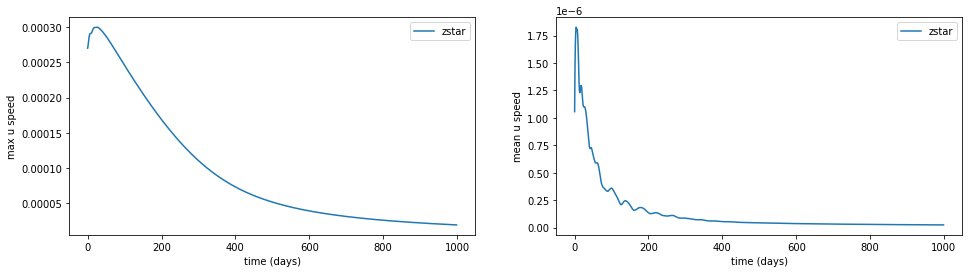

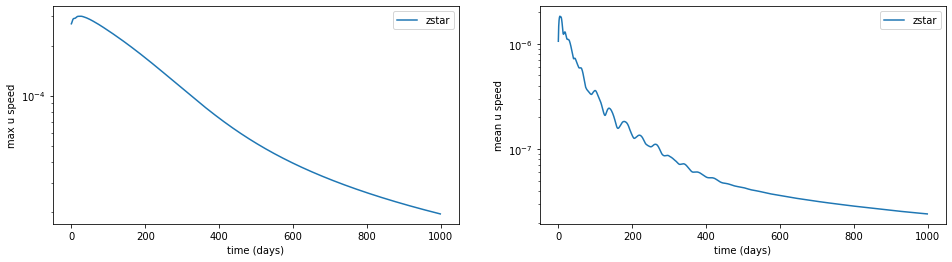

In [264]:
## Plot velocities
fig, axes = plt.subplots(ncols = 2, figsize = (16,4))


label = 'zstar-surfpressure-hack-minthick1e-12-topo-1000d'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time)),np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

axes[0].set_ylabel('max u speed')
axes[0].set_xlabel('time (days)')

axes[0].legend()
axes[1].plot(np.arange(len(prog.Time)),np.abs(prog.u).mean(['zl','yh','xq']), 
             label = 'zstar') 

axes[1].set_ylabel('mean u speed')
axes[1].set_xlabel('time (days)')

axes[1].legend()

plt.show()
## Plot velocities
fig, axes = plt.subplots(ncols = 2, figsize = (16,4))


label = 'zstar-surfpressure-hack-minthick1e-12-topo-1000d'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time)),np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 

axes[0].set_ylabel('max u speed')
axes[0].set_xlabel('time (days)')
axes[0].set_yscale('log')
axes[0].legend()
axes[1].plot(np.arange(len(prog.Time)),np.abs(prog.u).mean(['zl','yh','xq']), 
             label = 'zstar') 

axes[1].set_ylabel('mean u speed')
axes[1].set_xlabel('time (days)')

axes[1].legend()
axes[1].set_yscale('log')

plt.show()


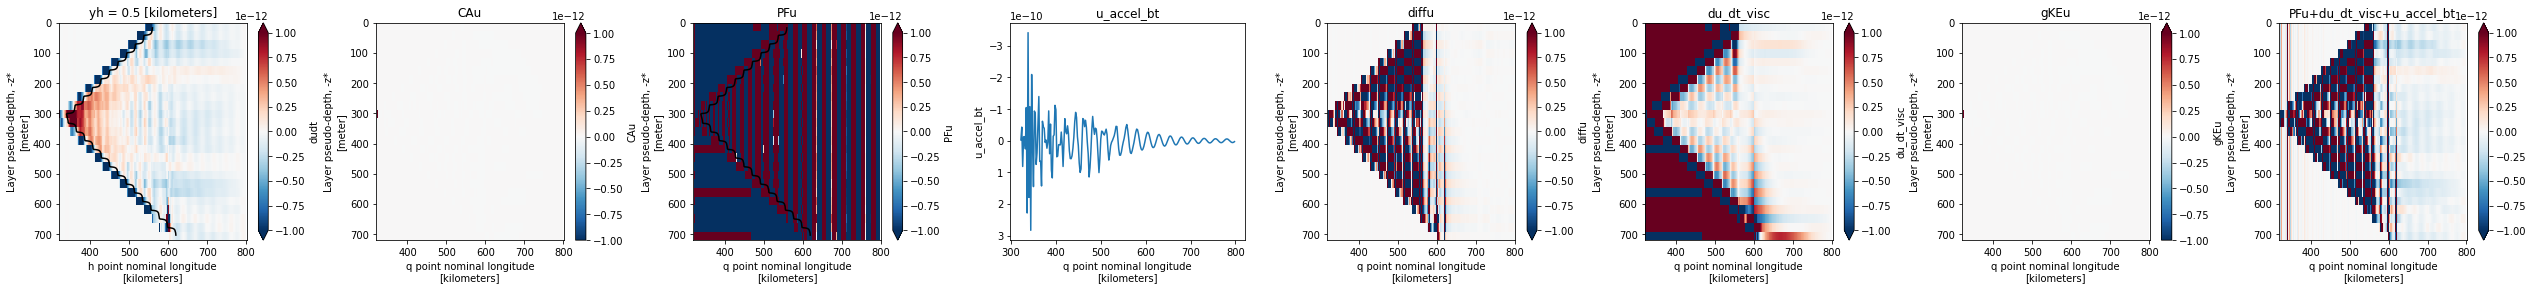

In [276]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo-100d-timeave'
mom = open_mom(label)
prog = open_files(label)
time = -3
y = 0

fig, axes = plt.subplots(ncols = 8, figsize= (44,4))
mom.dudt.isel(yh = y).mean('Time').plot(ax = axes[0], yincrease = False, vmin = -1e-12, vmax = 1e-12, cmap = 'RdBu_r')
axes[0].set_title('dudt')
prog.h.isel(yh = y).mean('Time').plot.contour(ax = axes[0], yincrease = False, levels = [27], colors = 'k')
prog.h.isel(yh = y).mean('Time').plot.contour(ax = axes[2], yincrease = False, levels = [27], colors = 'k')

mom.CAu.isel(yh = y).mean('Time').plot(ax = axes[1], yincrease = False, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[1].set_title('CAu')
mom.PFu.isel(yh = y).mean('Time').plot(ax = axes[2], yincrease = False, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(yh = y).mean('Time').plot(ax = axes[3], yincrease = False)
axes[3].set_title('u_accel_bt')
mom.diffu.isel(yh = y).mean('Time').plot(ax = axes[4], yincrease = False, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(yh = y).mean('Time').plot(ax = axes[5], yincrease = False, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(yh = y).mean('Time').plot(ax = axes[6], yincrease = False, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[6].set_title('gKEu')
(mom.du_dt_visc+mom.PFu+mom.u_accel_bt).isel(yh = y).mean('Time').plot(ax = axes[7], yincrease = False, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[7].set_title('PFu+du_dt_visc+u_accel_bt')


fig.subplots_adjust(wspace = 0.35)

# Convergence of mean velocity with grounding line

## New MWIPG option

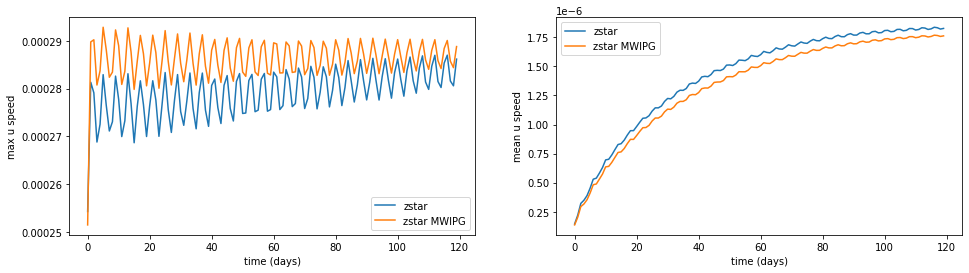

In [9]:
## Plot velocities
fig, axes = plt.subplots(ncols = 2, figsize = (16,4))


label = 'zstar-surfpressure-hack-minthick1e-12-topo'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time)),np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar') 
label = 'zstar-surfpressure-hack-minthick1e-12-topo-MWIPG'
prog = open_files(label)
axes[0].plot(np.arange(len(prog.Time)),np.abs(prog.u).max(['zl','yh','xq']), 
             label = 'zstar MWIPG') 

axes[0].set_ylabel('max u speed')
axes[0].set_xlabel('time (days)')

axes[0].legend()

label = 'zstar-surfpressure-hack-minthick1e-12-topo'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time)),np.abs(prog.u).mean(['zl','yh','xq']), 
             label = 'zstar') 
label = 'zstar-surfpressure-hack-minthick1e-12-topo-MWIPG'
prog = open_files(label)
axes[1].plot(np.arange(len(prog.Time)),np.abs(prog.u).mean(['zl','yh','xq']), 
             label = 'zstar MWIPG') 

axes[1].set_ylabel('mean u speed')
axes[1].set_xlabel('time (days)')

axes[1].legend()

plt.show()


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_73333/3548223503.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_73333/3548223503.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

Text(0.5, 0.98, 'Time = 0 hours')

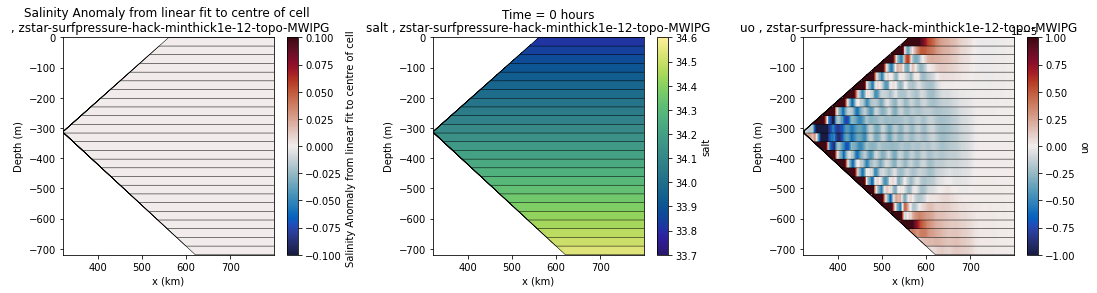

In [10]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo-MWIPG'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8

plot(axes[0],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-1,1e-1,cm.cm.balance,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

time = -1

plot(axes[2],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_73333/3548223503.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_73333/3548223503.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

Text(0.5, 0.98, 'Time = 0 hours')

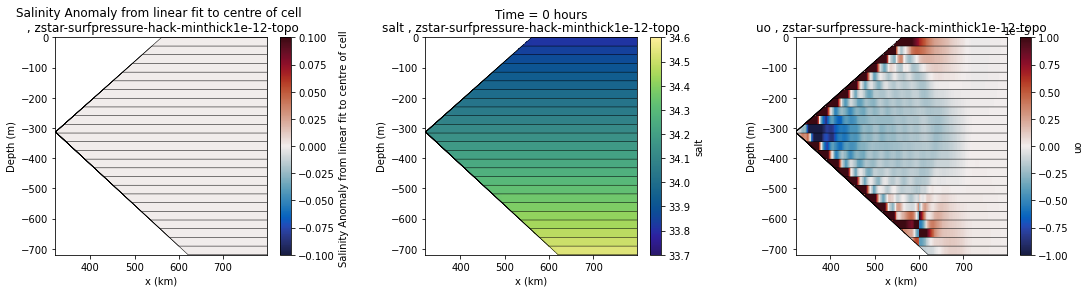

In [11]:
label = 'zstar-surfpressure-hack-minthick1e-12-topo'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8

plot(axes[0],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-1,1e-1,cm.cm.balance,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

time = -1

plot(axes[2],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_73333/3548223503.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_73333/3548223503.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

Text(0.5, 0.98, 'Time = 0 hours')

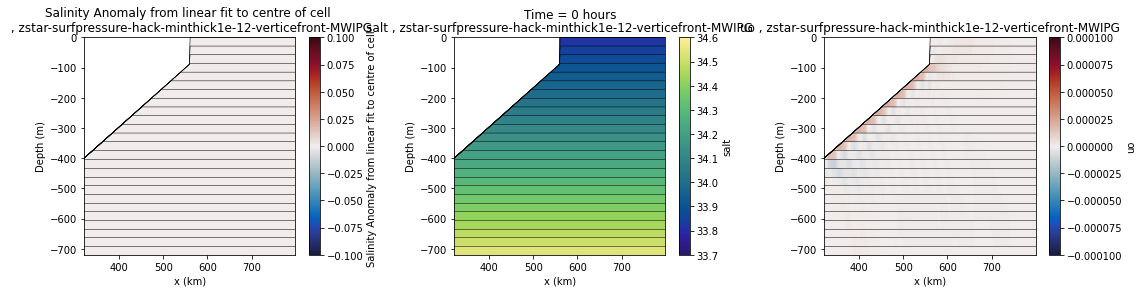

In [14]:
label = 'zstar-surfpressure-hack-minthick1e-12-verticefront-MWIPG'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8

plot(axes[0],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-1,1e-1,cm.cm.balance,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

time = -1

plot(axes[2],x,time,0,prog.u,"uo",-1e-4,1e-4,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_73333/3548223503.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_73333/3548223503.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders

Text(0.5, 0.98, 'Time = 0 hours')

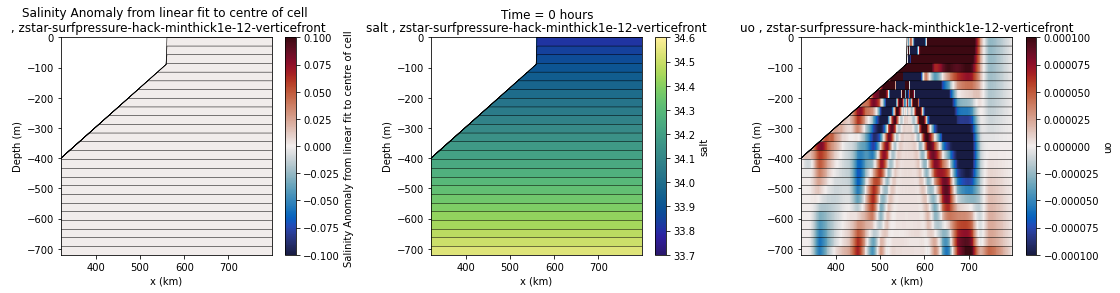

In [15]:
label = 'zstar-surfpressure-hack-minthick1e-12-verticefront'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8

plot(axes[0],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-1,1e-1,cm.cm.balance,ymax)

prog = open_files(label)
IC = open_IC(label)

plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)

prog = open_files(label)
IC = open_IC(label)

time = -1

plot(axes[2],x,time,0,prog.u,"uo",-1e-4,1e-4,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')